In [4]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri Setinin Tanıtımı

Veri seti, simüle edilmiş trafik kazası verilerini içeren detaylı kayıtlardan oluşmaktadır. Bu simülasyonlar, kaza sırasında hayatta kalma olasılığını etkileyen faktörlere odaklanarak oluşturulmuştur.

Hedef Değişken:
Veri setindeki hedef değişken, kaza sonucunda hayatta kalma durumudur (örneğin, 0: hayatta kalmadı, 1: hayatta kaldı).

In [5]:

df=pd.read_csv('veri.csv')



# 2. Veri Ön İşleme

In [6]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [7]:
df.tail()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1
199,56,Female,43.0,No,Yes,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [9]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df['Survived'] = df['Survived'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Helmet_Used'] = df['Helmet_Used'].astype('category')
df['Seatbelt_Used'] = df['Seatbelt_Used'].astype('category')
df['Speed_of_Impact'] = df['Speed_of_Impact'].astype('int64')

In [12]:
df.describe()

,Age,Speed_of_Impact
count,196.000000,196.000000
mean,43.341837,70.433673
std,15.004973,30.202236
min,18.000000,20.000000
25%,31.000000,43.000000
50%,44.000000,71.000000
75%,56.000000,95.500000
max,69.000000,119.000000


In [13]:
df.describe(include='category')

,Gender,Helmet_Used,Seatbelt_Used,Survived
count,196,196,196,196
unique,2,2,2,2
top,Female,Yes,Yes,1
freq,109,109,110,100


# 3. Keşifsel Veri Analizi ve Görselleştirme




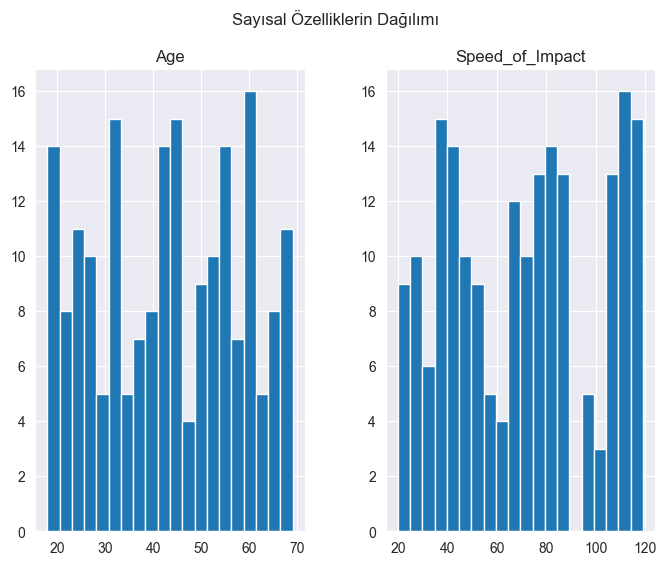

In [14]:
df.hist(bins=20, figsize=(8,6))
plt.suptitle('Sayısal Özelliklerin Dağılımı')
plt.show()

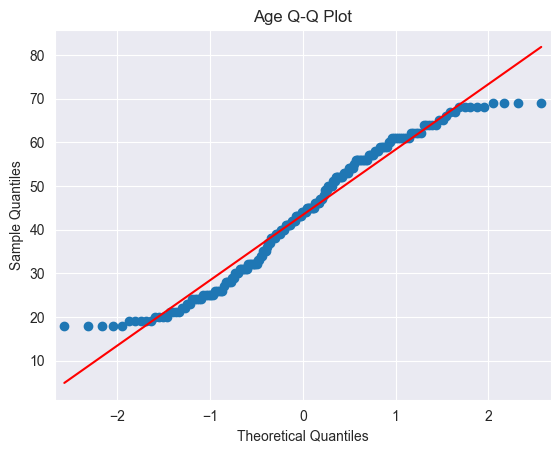

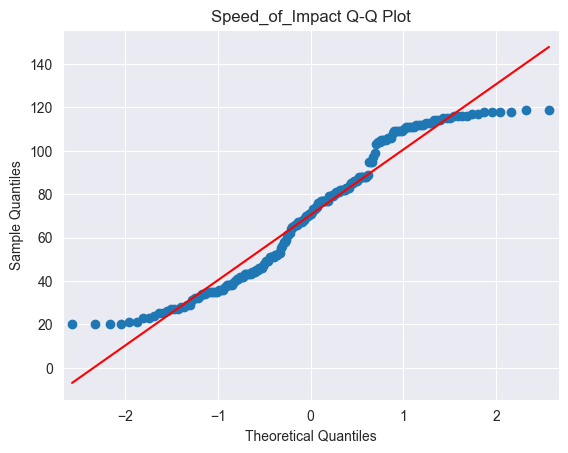

In [15]:
import statsmodels.api as sm

sm.qqplot(df['Age'], line='s')  # age değişkeni için Q-Q plot
plt.title('Age Q-Q Plot')
plt.show()

sm.qqplot(df['Speed_of_Impact'], line='s')  # speed değişkeni için Q-Q plot
plt.title('Speed_of_Impact Q-Q Plot')
plt.show()

In [ ]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df['Age'])
print('Age - Statistic:', statistic, 'p-value:', p_value)

statistic, p_value = shapiro(df['Speed_of_Impact'])
print('Speed - Statistic:', statistic, 'p-value:', p_value)

Shapiro-Wilk test sonuçlarına göre, hem Age hem de Speed of impact değişkenlerinin normal dağılıma uyduğu söylenemez.

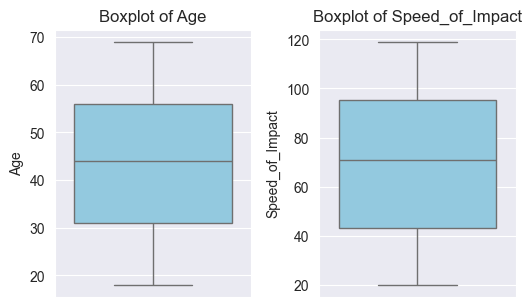

In [16]:
numeric_columns = df.select_dtypes(include=np.number).columns


plt.figure(figsize=(8,6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column], color="skyblue")
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()

plt.show()

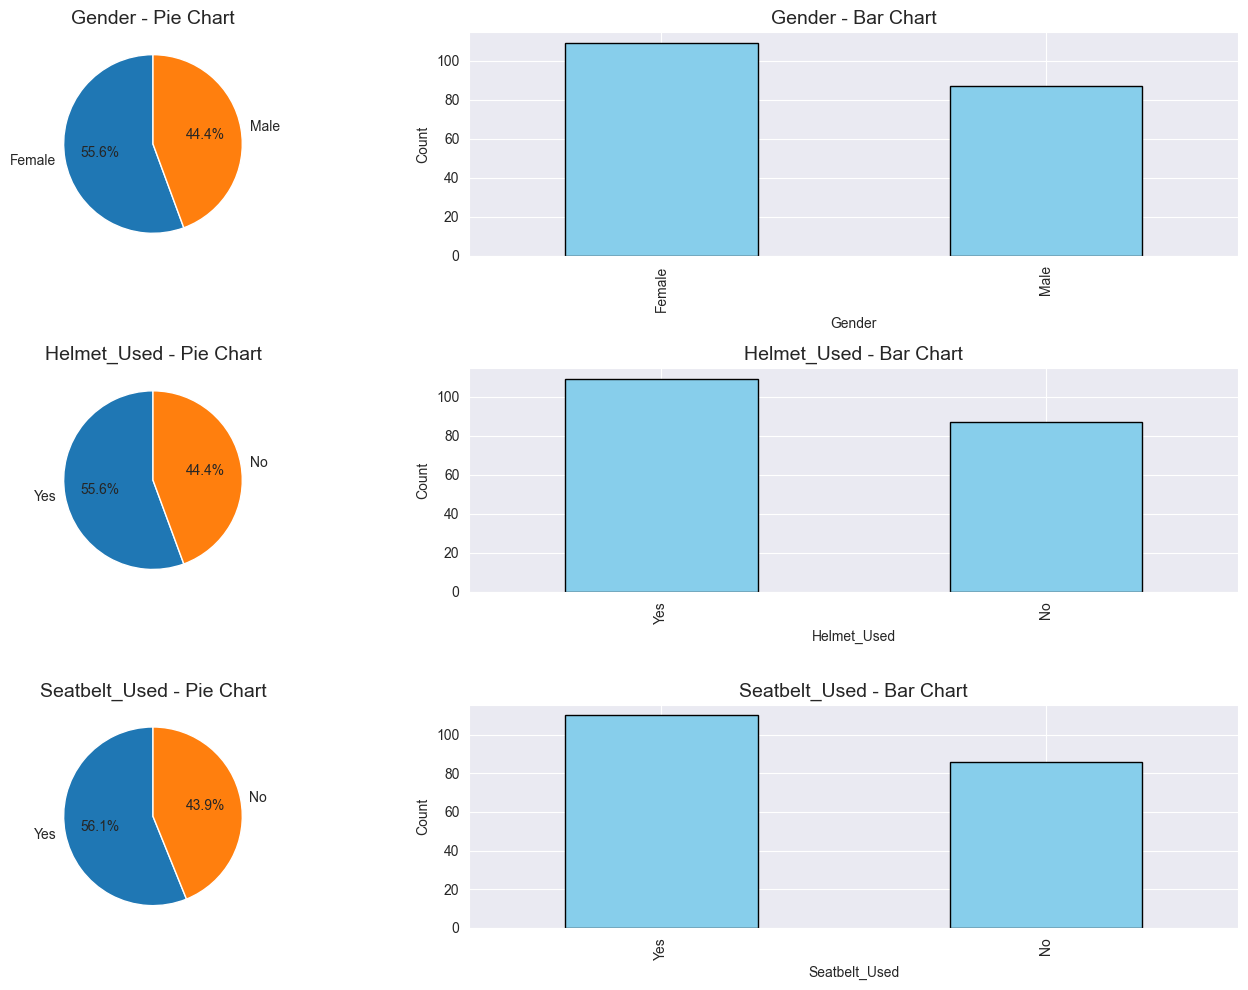

In [17]:
def count_pie(df, col, ax):
    counts = df[col].value_counts()
    ax[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax[0].set_title(f"{col} - Pie Chart", fontsize=14)

    counts.plot(kind='bar', ax=ax[1], color='skyblue', edgecolor='black')
    ax[1].set_title(f"{col} - Bar Chart", fontsize=14)
    ax[1].set_xlabel(col)
    ax[1].set_ylabel("Count")


cat_cols = ['Gender',	'Helmet_Used',	'Seatbelt_Used']
fig, ax = plt.subplots(3, 2, figsize=(15,10))

for i, col in enumerate(cat_cols):
    count_pie(df, col, ax=(ax[i % 3, i // 3], ax[i % 3, i // 3 + 1]))

plt.tight_layout()
plt.show()

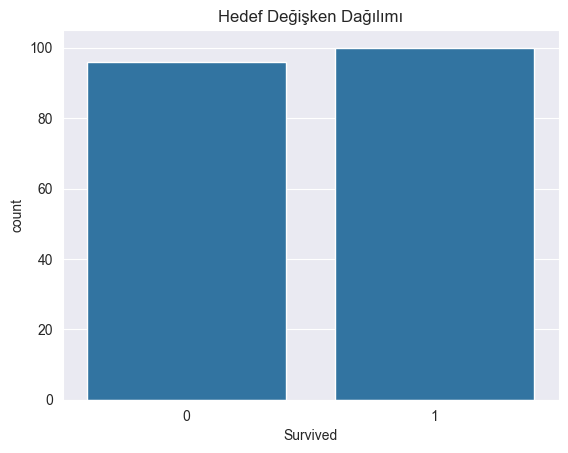

In [18]:
sns.countplot(x='Survived', data=df)
plt.title('Hedef Değişken Dağılımı')
plt.show()

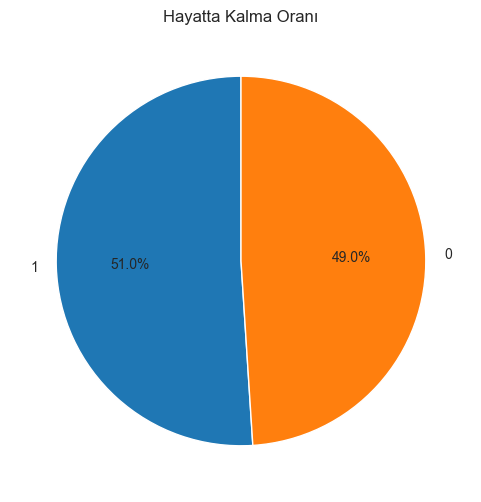

In [19]:
import matplotlib.pyplot as plt

survived_counts = df['Survived'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Hayatta Kalma Oranı')
plt.show()

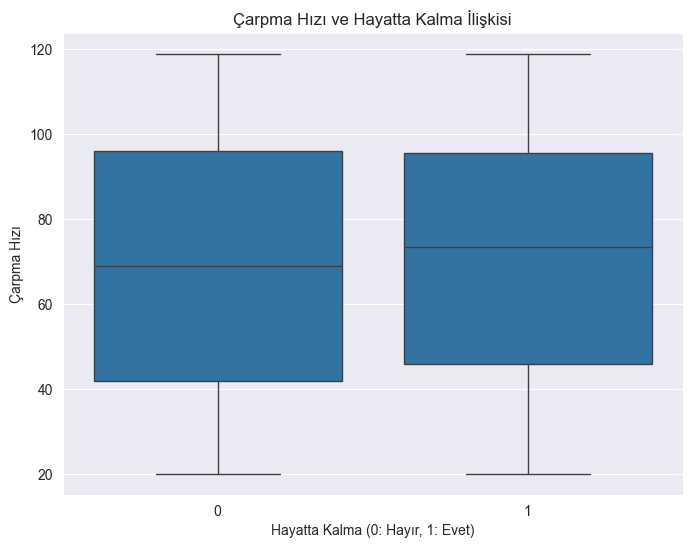

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Speed_of_Impact', data=df)
plt.title('Çarpma Hızı ve Hayatta Kalma İlişkisi')
plt.xlabel('Hayatta Kalma (0: Hayır, 1: Evet)')
plt.ylabel('Çarpma Hızı')
plt.show()

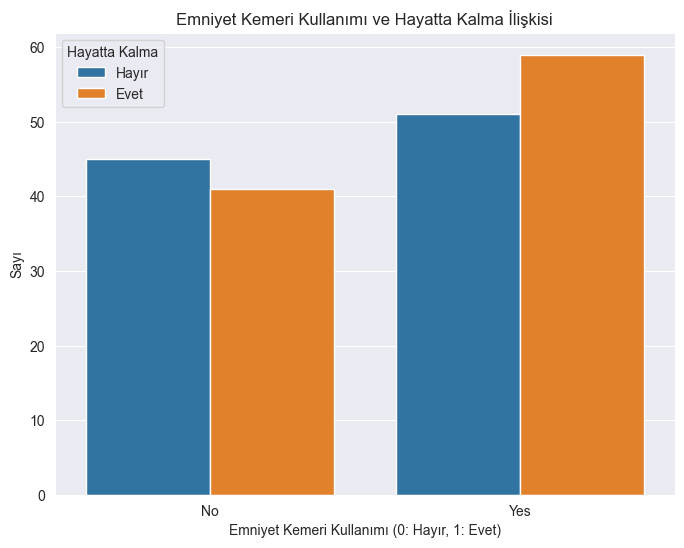

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Seatbelt_Used', hue='Survived', data=df)
plt.title('Emniyet Kemeri Kullanımı ve Hayatta Kalma İlişkisi')
plt.xlabel('Emniyet Kemeri Kullanımı (0: Hayır, 1: Evet)')
plt.ylabel('Sayı')
plt.legend(title='Hayatta Kalma', labels=['Hayır', 'Evet'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


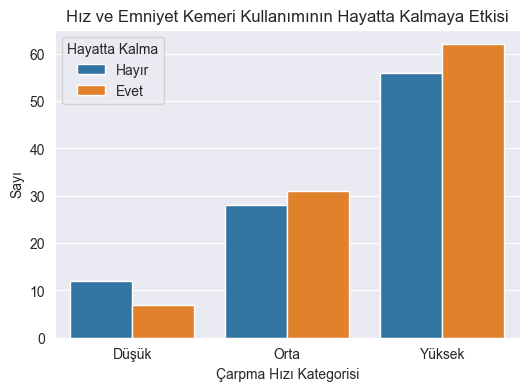

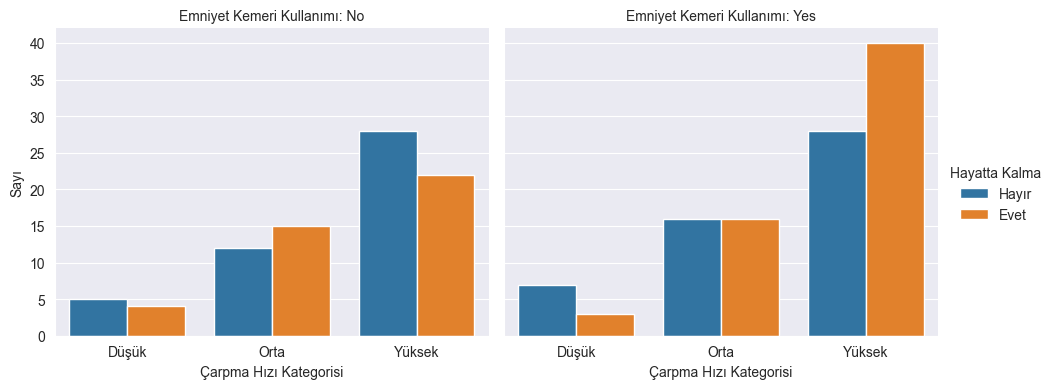

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hız değişkenini kategorilere ayır (örneğin, düşük, orta, yüksek)
df['Speed_Category'] = pd.cut(df['Speed_of_Impact'], bins=[0, 30, 60, float('inf')], labels=['Düşük', 'Orta', 'Yüksek'])

# Gruplanmış sütun grafiği oluştur
plt.figure(figsize=(6,4))
sns.countplot(x='Speed_Category', hue='Survived', data=df, hue_order=[0, 1])
plt.title('Hız ve Emniyet Kemeri Kullanımının Hayatta Kalmaya Etkisi')
plt.xlabel('Çarpma Hızı Kategorisi')
plt.ylabel('Sayı')
plt.legend(title='Hayatta Kalma', labels=['Hayır', 'Evet'])

# Emniyet kemeri kullanımına göre gruplandır
g = sns.catplot(x='Speed_Category', hue='Survived', col='Seatbelt_Used',
                data=df, kind='count', height=4, aspect=1.2, legend=False,
                hue_order=[0, 1])
g.set_axis_labels("Çarpma Hızı Kategorisi", "Sayı")
g.set_titles("Emniyet Kemeri Kullanımı: {col_name}")
g.add_legend(title='Hayatta Kalma', labels=['Hayır', 'Evet'])

plt.show()

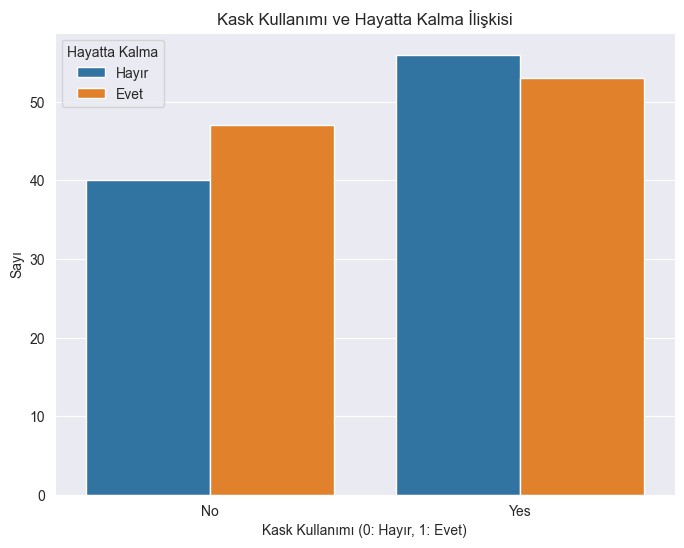

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Helmet_Used', hue='Survived', data=df)
plt.title('Kask Kullanımı ve Hayatta Kalma İlişkisi')
plt.xlabel('Kask Kullanımı (0: Hayır, 1: Evet)')
plt.ylabel('Sayı')
plt.legend(title='Hayatta Kalma', labels=['Hayır', 'Evet'])
plt.show()

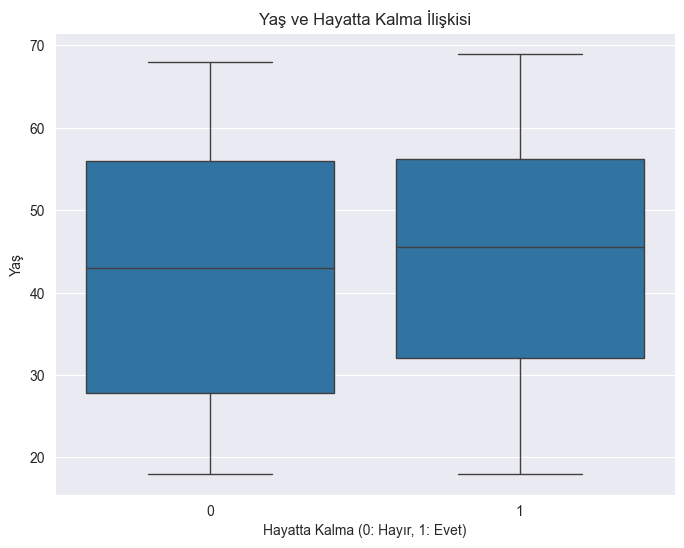

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Yaş ve Hayatta Kalma İlişkisi')
plt.xlabel('Hayatta Kalma (0: Hayır, 1: Evet)')
plt.ylabel('Yaş')
plt.show()

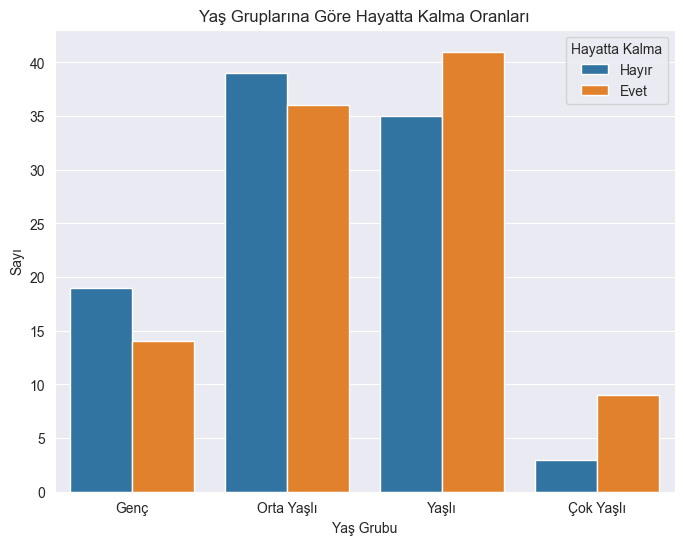

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Yaş değişkenini kategorilere ayır
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 45, 65, float('inf')], labels=['Genç', 'Orta Yaşlı', 'Yaşlı', 'Çok Yaşlı'])

# Sütun grafiği oluştur
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', hue='Survived', data=df)
plt.title('Yaş Gruplarına Göre Hayatta Kalma Oranları')
plt.xlabel('Yaş Grubu')
plt.ylabel('Sayı')
plt.legend(title='Hayatta Kalma', labels=['Hayır', 'Evet'])
plt.show()

# 4. Modelleme Süreci

In [26]:
df=df.drop(columns=['Age_Group'])
df=df.drop(columns=['Speed_Category'])

In [27]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [28]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,3,4])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 1.0 ... 0.0 56 27]
 [1.0 0.0 1.0 ... 1.0 69 46]
 [0.0 1.0 0.0 ... 1.0 46 46]
 ...
 [0.0 1.0 1.0 ... 1.0 58 110]
 [0.0 1.0 1.0 ... 1.0 20 103]
 [1.0 0.0 1.0 ... 1.0 56 43]]


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# 5. Lojistik Regresyon Uygulaması

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000,random_state=42)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[ 6 19]
 [ 4 11]]
              precision    recall  f1-score   support

           0       0.60      0.24      0.34        25
           1       0.37      0.73      0.49        15

    accuracy                           0.42        40
   macro avg       0.48      0.49      0.42        40
weighted avg       0.51      0.42      0.40        40



# 6. Random Forest Uygulaması

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=40,random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[10 15]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.62      0.40      0.49        25
           1       0.38      0.60      0.46        15

    accuracy                           0.47        40
   macro avg       0.50      0.50      0.47        40
weighted avg       0.53      0.47      0.48        40

